# PRML Assignment 2

@uthor :- Darshil Patel(202011034)

In [ ]:
#useful librarys for this assigment
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
%matplotlib inline

## Q1 

In [ ]:
#parameters for 1st distribution
mu1 = 10
sigma1 = np.sqrt(20)

#parameters for 2nd distribution
mu2 = 20
sigma2 = np.sqrt(25)

In [ ]:
#200 samples from 1st normal distribution
normal_distribution_1 = np.random.normal(mu1,sigma1,200)

#200 samples from 2nd normal distribution
normal_distribution_2 = np.random.normal(mu2,sigma2,200)

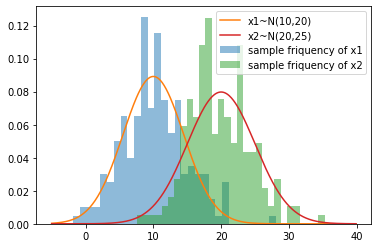

In [ ]:
#histogram of normal distribution
x = np.arange(-5,40,0.1)

#histogram of 1st normal distribution
plt.hist(normal_distribution_1 ,bins = 30 ,density=True,label='sample friquency of x1',alpha=0.5)

#pdf of 1st normal distribution
pdf1 = (1/(sigma1*(np.sqrt(2*np.pi))))*np.exp(-(x-mu1)**2 / (2*(sigma1**2)))

#plot 1st pdf    
plt.plot(x,pdf1,label = 'x1~N(10,20)')

#histogram of 2nd normal distribution
plt.hist(normal_distribution_2 ,bins = 30 ,density=True,label='sample friquency of x2',alpha=0.5)

#pdf for 2nd normal distribution
pdf2 = (1/(sigma2*(np.sqrt(2*np.pi))))*np.exp(-(x-mu2)**2 / (2*(sigma2**2)))

#plot 2nd pdf    
plt.plot(x,pdf2,label = 'x2~N(20,25)')

plt.legend()
plt.show()

In [ ]:
# calculate mean and standard deviation from 200 semples

real_mu1 = np.mean(normal_distribution_1)
real_sigma1 = np.std(normal_distribution_1)
real_mu2 = np.mean(normal_distribution_2)
real_sigma2 = np.std(normal_distribution_2)

print("for distribution 1,")
print("mu1 :-",real_mu1) 
print("sigma1 :-",real_sigma1)
print("for distribution 2,")
print("mu2 :-",real_mu2)
print("sigma2 :-",real_sigma2)

for distribution 1,
mu1 :- 10.17854628234326
sigma1 :- 4.667353903224032
for distribution 2,
mu2 :- 19.776417759909695
sigma2 :- 4.486267543281438


In [ ]:
#classification function
def distribute(P1,P2,mu1,sigma1,mu2,sigma2,samples):
    n = len(samples)
    classes = [0]*n
    for i in range(n):
        sample = samples[i]
        
        # finde probability for both classes 
        p1 = (1/(sigma1*(np.sqrt(2*np.pi))))*np.exp(-(sample-mu1)**2 / (2*(sigma1**2)))
        p2 = (1/(sigma2*(np.sqrt(2*np.pi))))*np.exp(-(sample-mu2)**2 / (2*(sigma2**2)))

        #classification using BDR
        classes[i] = 'b' if p1*P1 > p2*P2 else 'g'
    return classes

[17.5878836   7.76538145  6.29364053 14.97793877 12.10411615 17.59553378
  9.90440267 19.23303371 19.24937593 16.21738345 11.98782572  6.7861355
  9.04785917  5.33710436 17.4268904  17.58164154 18.56530406 18.63452615
 19.83962047 13.69432365 11.68191869  8.10427921 11.14540308  7.56074588
 17.19367405 15.15172957 10.94808087 10.27626577  5.04081267 16.8205787
  8.57961306 11.67575322  6.05581201 13.87153988 12.7579442  14.58540515
  5.65528651 13.0364044   9.75191425  9.93030704]
['g', 'b', 'b', 'b', 'b', 'g', 'b', 'g', 'g', 'g', 'b', 'b', 'b', 'b', 'g', 'g', 'g', 'g', 'g', 'b', 'b', 'b', 'b', 'b', 'g', 'g', 'b', 'b', 'b', 'g', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b']


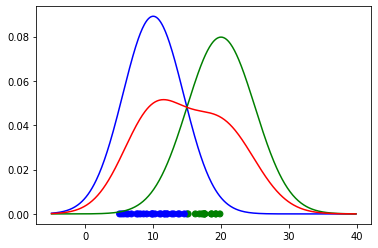

In [ ]:
#appriory probability
P1 = 0.5
P2 = 0.5

# 40 samples from uniform distribution
samples = np.random.uniform(5,20,40)
print(samples)

#classify samples
classes = distribute(P1,P2,real_mu1,real_sigma1,real_mu2,real_sigma2,samples)
print(classes)

# plot 1st distribution 
plt.plot(x,pdf1,'b-',label = 'pdf1')

# plot 2nd distribution 
plt.plot(x,pdf2,'g-',label = 'pdf2')

# combine two distribution
pdf = P1*pdf1  + P2*pdf2

# plot merged distribituon
plt.plot(x,pdf,'r-',label = 'pdf')

# plot classified sample point 
plt.scatter(samples,np.zeros_like(samples),c = classes)
# plt.hist(classes,bins = 2)
# plt.show()


[ 7.49083122 17.38280846 13.2404806  15.05358736 13.47429758 17.7127655
 14.8902038   6.91715329 19.6993882   6.68692832  5.029694    5.76135514
 19.58463041 14.71755658 11.42963559 16.23556549  7.33348324 10.77590076
 10.91445764 18.44900513 17.5222427  14.85251783 16.27348771 14.4658796
 16.14802723 16.05582738 18.90416388 10.60238682 11.4641      9.47389397
 16.21140954 15.30216871  6.82889804 12.44501298 12.49956173 13.66943208
 14.31765203  9.44101435 18.2226119   7.39547284]
['b', 'g', 'g', 'g', 'g', 'g', 'g', 'b', 'g', 'b', 'b', 'b', 'g', 'g', 'b', 'g', 'b', 'b', 'b', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'b', 'b', 'b', 'g', 'g', 'b', 'b', 'b', 'g', 'g', 'b', 'g', 'b']


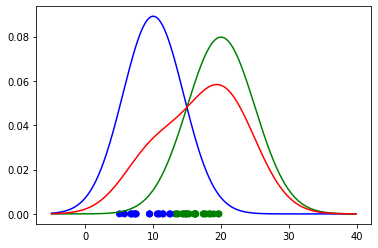

In [ ]:
#appriory probability
P1 = 0.3
P2 = 0.7

# 40 samples from uniform distribution
samples = np.random.uniform(5,20,40)
print(samples)

#classify samples
classes = distribute(P1,P2,real_mu1,real_sigma1,real_mu2,real_sigma2,samples)
print(classes)

# plot 1st distribution 
plt.plot(x,pdf1,'b-',label = 'pdf1')

# plot 2nd distribution 
plt.plot(x,pdf2,'g-',label = 'pdf2')

# combine two distribution
pdf = P1*pdf1  + P2*pdf2

# plot merged distribituon
plt.plot(x,pdf,'r-',label = 'pdf')

# plot classified sample point 
plt.scatter(samples,np.zeros_like(samples),c = classes)
# plt.hist(classes,bins = 2)
# plt.show()


[16.8113594  14.00233821  9.82501694 15.77265551 15.71464467  5.07458113
 15.09898467 17.04526127 17.85520071 18.51138692  5.82546922 12.53777559
  6.97561703  9.57920622 16.82885789  5.28283616 15.2334286  19.77835073
  9.87098219 11.90173846 15.44487544  8.311469   17.29171178 16.70249633
 11.18872434 16.41368345  5.44212251  9.94965475  5.74490891  5.18179408
  9.01341286 12.3363233  14.1145772  19.71950352 17.91910352  5.35663894
  6.75419843 16.22651985 17.99982614  9.40236   ]
['b', 'b', 'b', 'b', 'b', 'b', 'b', 'g', 'g', 'g', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'g', 'b', 'b', 'b', 'b', 'g', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'g', 'g', 'b', 'b', 'b', 'g', 'b']


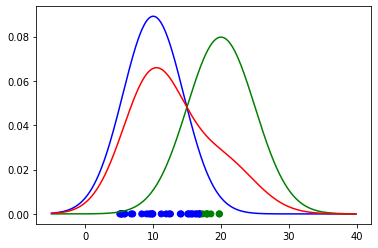

In [ ]:
#appriory probability
P1 = 0.7
P2 = 0.3

# 40 samples from uniform distribution
samples = np.random.uniform(5,20,40)
print(samples)

#classify samples
classes = distribute(P1,P2,real_mu1,real_sigma1,real_mu2,real_sigma2,samples)
print(classes)

# plot 1st distribution 
plt.plot(x,pdf1,'b-',label = 'pdf1')

# plot 2nd distribution 
plt.plot(x,pdf2,'g-',label = 'pdf2')

# combine two distribution
pdf = P1*pdf1  + P2*pdf2

# plot merged distribituon
plt.plot(x,pdf,'r-',label = 'pdf')

# plot classified sample point 
plt.scatter(samples,np.zeros_like(samples),c = classes)
# plt.hist(classes,bins = 2)
# plt.show()


## Q2

In [ ]:
# classifier fot iris dataset
class Classifier:

  # initialize varibles
  def __init__(self):
    mu_setosa = 0
    cov_setosa = 0
    mu_versicolor = 0
    cov_versicolor = 0
    mu_virginica = 0
    cov_virginica = 0

  # calculate mu and cov from training dataset
  def fit(self,x_train_setosa,x_train_versicolor,x_train_virginica):
    
    # mu,cov for setosa
    self.mu_setosa = np.mean(x_train_setosa).to_numpy()
    self.cov_setosa = np.cov(x_train_setosa.T)

    # mu,cov for versicolor
    self.mu_versicolor = np.mean(x_train_versicolor).to_numpy()
    self.cov_versicolor = np.cov(x_train_versicolor.T)

    # mu,cov for virginica
    self.mu_virginica = np.mean(x_train_virginica).to_numpy()
    self.cov_virginica = np.cov(x_train_virginica.T)
    return self

  # predict labels
  def predict(self,x_test):
    x_test = x_test.to_numpy()
    y_predict = []
    for x in x_test:

      # calculate probability for setosa,versicolor and virginica
      p_setosa = (1/np.sqrt(np.linalg.det(self.cov_setosa)))*np.exp((-1/2)*(np.subtract(x,self.mu_setosa.T)@np.linalg.inv(self.cov_setosa)@(np.subtract(x,self.mu_setosa.T).T)))
      p_versicolor = (1/np.sqrt(np.linalg.det(self.cov_versicolor)))*np.exp((-1/2)*(np.subtract(x,self.mu_versicolor.T)@np.linalg.inv(self.cov_versicolor)@(np.subtract(x,self.mu_versicolor.T).T)))
      p_virginica = (1/np.sqrt(np.linalg.det(self.cov_virginica)))*np.exp((-1/2)*(np.subtract(x,self.mu_virginica.T)@np.linalg.inv(self.cov_virginica)@(np.subtract(x,self.mu_virginica.T).T)))
      
      # if p_setosa is high then assign label setosa
      if p_setosa >= p_versicolor and p_setosa > p_virginica:
        y_predict.append("Iris-setosa")
      
      # if p_versicolor is high then assign label versicolor
      elif p_versicolor > p_setosa and p_versicolor >= p_virginica:
        y_predict.append("Iris-versicolor")

      # if p_virginica is high then assign label virginica
      else:
        y_predict.append("Iris-virginica")
    return y_predict

  # calculate accuracy
  def accuracy(self,y_test,y_predict):
    error = 0
    for x,y in zip(y_test,y_predict):
      if x != y:
        error += 1
    ac = ((len(y_test)-error)/len(y_test))*100
    return ac
    

In [ ]:
# read dataset
data_frame = pd.read_csv(
    filepath_or_buffer='https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',
    header=None,
    sep=',')

data_frame.columns=['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'flower_class']
data_frame.dropna(how="all", inplace=True) # drops the empty line at file-end
data_frame.head()

,sepal_len,sepal_wid,petal_len,petal_wid,flower_class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
# 3 partition based on labels
grouped = data_frame.groupby(data_frame.flower_class)
setosa = grouped.get_group("Iris-setosa")
versicolor = grouped.get_group("Iris-versicolor")
virginica = grouped.get_group("Iris-virginica")

# fetures and labels
x_setosa = setosa.iloc[:,:-1]
y_setosa = setosa.iloc[:,-1]
x_versicolor = versicolor.iloc[:,:-1]
y_versicolor = versicolor.iloc[:,-1]
x_virginica = virginica.iloc[:,:-1]
y_virginica = virginica.iloc[:,-1]

In [ ]:
classifier = Classifier()
iterations = 10
ac_list = []
for i in range(iterations):
  print("-------------------------Iteration",i+1,"-------------------------")

  # training data and test data (120:30)
  x_train_setosa, x_test_setosa, y_train_setosa, y_test_setosa  = train_test_split(x_setosa, y_setosa,test_size=0.2)
  x_train_versicolor, x_test_versicolor, y_train_versicolor, y_test_versicolor= train_test_split(x_versicolor, y_versicolor, test_size=0.2)
  x_train_virginica, x_test_virginica,  y_train_virginica, y_test_virginica,= train_test_split(x_virginica, y_virginica, test_size=0.2)

  # test data and label
  x_test = pd.concat([x_test_setosa , x_test_versicolor, x_test_virginica])
  y_test = list(pd.concat([y_test_setosa, y_test_versicolor, y_test_virginica]))

  # train the model
  classifier = classifier.fit(x_train_setosa,x_train_versicolor,x_train_virginica)

  # prediction
  y_predict = classifier.predict(x_test)

  print("original classes:-\n",y_test)
  print("predicted classes:-\n",y_predict)

  # accuracy for perticular iteration
  ac = classifier.accuracy(y_test,y_predict)
  print("accuracy :- ",ac)
  ac_list.append(ac)

print("-------------------------")

# accuracy of the model
average_ac = sum(ac_list)/len(ac_list)

print("model's accuracy :-",average_ac)

-------------------------Iteration 1 -------------------------
original classes:-
 ['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica', 'Iris-virginica', 'Iris-virginica', 'Iris-virginica', 'Iris-virginica', 'Iris-virginica', 'Iris-virginica', 'Iris-virginica', 'Iris-virginica', 'Iris-virginica']
predicted classes:-
 ['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica', 'Iris-virginica', 